# Forests of randomized trees
Some References:
- https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from helper_functions import clean_data, model_statistics, plot_pred, extract_r_p

### Data Preprocessing
- Removing outliers of price
- Apply categorial label

In [2]:
london = pd.read_csv('london_weekdays.csv')
london = clean_data(london)
london.head()


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


### Split Data

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [4]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
x,y = extract_r_p(london)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
x_train.head()

,person_capacity,bedrooms,dist,attr_index_norm,rest_index_norm,room_type,biz
3058,4.0,1,7.291867,12.451087,6.213314,1,0
2080,3.0,2,6.552215,13.865019,7.448085,2,0
3030,2.0,1,5.941963,14.433437,8.695897,2,0
903,2.0,4,14.002647,6.078395,3.278144,1,0
2494,2.0,1,5.344699,15.134916,8.482204,1,1


### Train and Test

In [6]:
# create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model.fit(x_train, y_train.values.ravel())

#Prediction using test data set 
y_test_pred = model.predict(x_test)

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6961588607931524
Mean Squared Error (MSE) 	: 8882.934245592638



C:\Users\pwspang\Desktop\SC1015-AirBNB\helper_functions.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  axes.plot(y_test, y_test, 'w-', linewidth = 3, color="red")


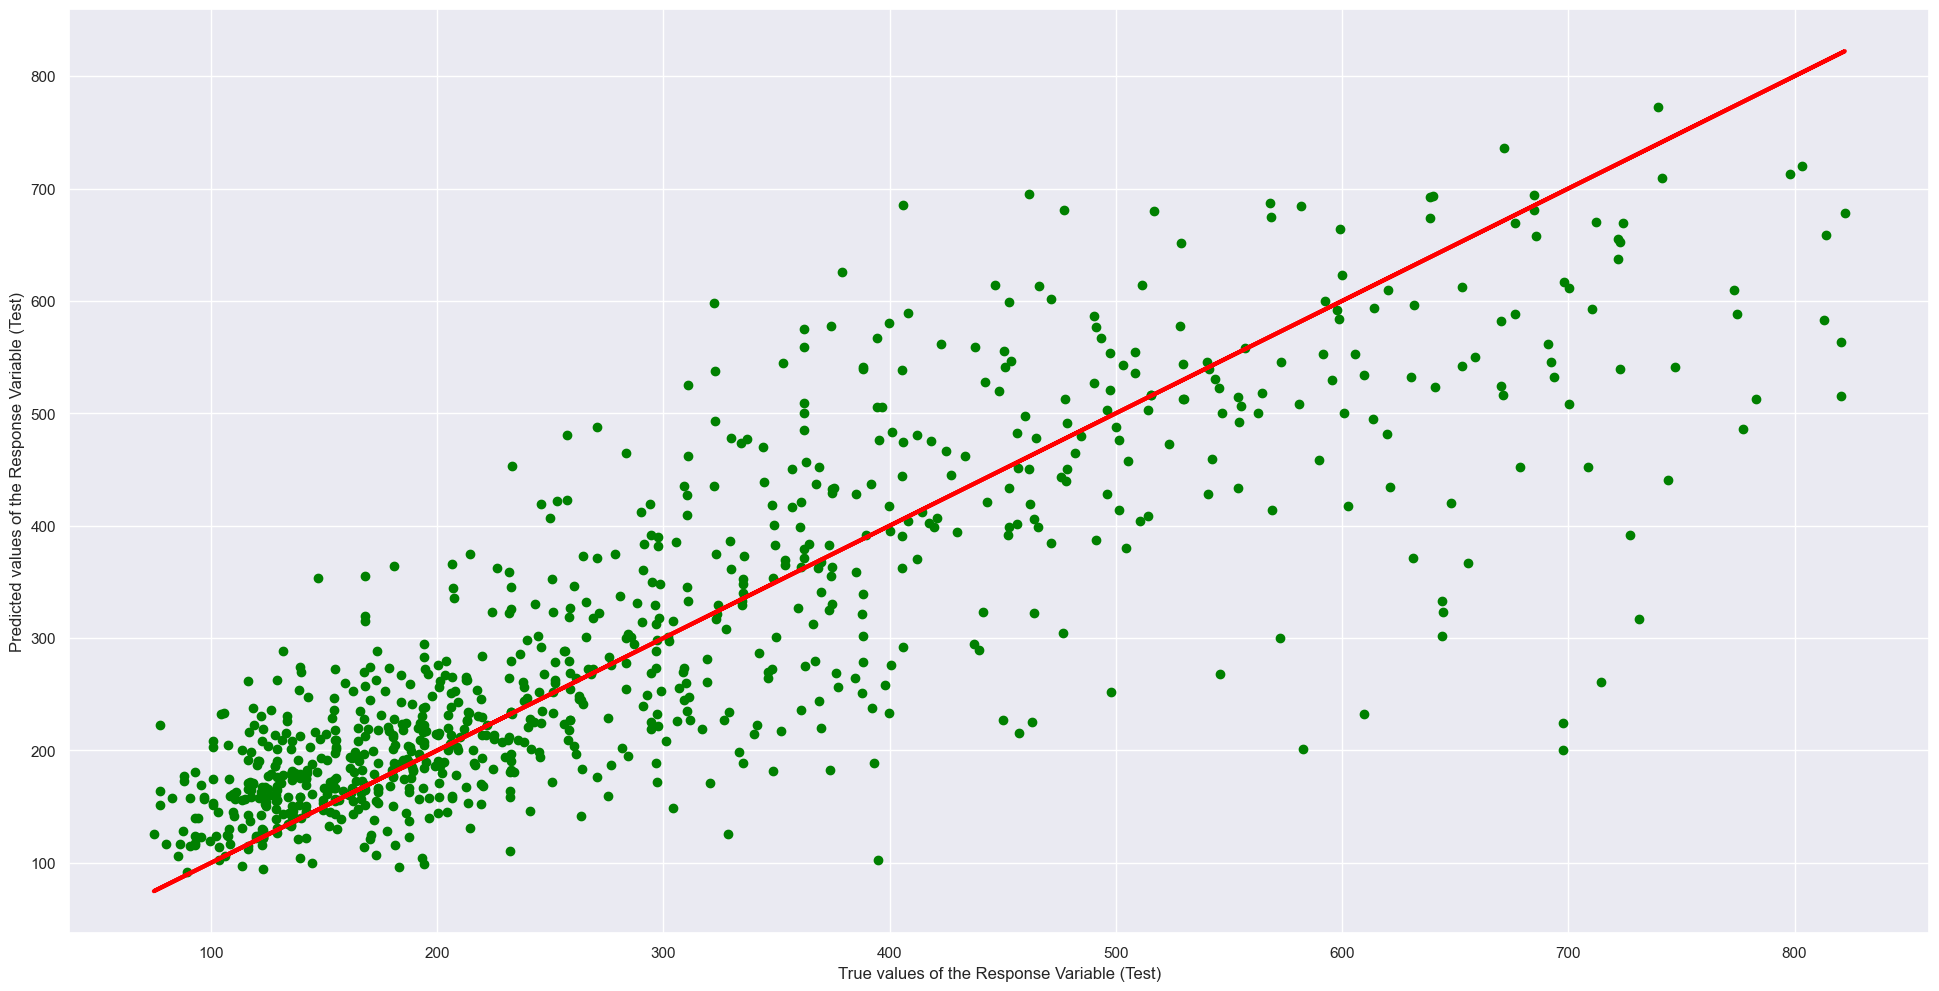

In [7]:
model_statistics(model, x_test, y_test, y_test_pred)

plot_pred(y_test, y_test_pred)